# Heart Disease Prediction

This notebook uses machine learning to predict whether a patient has heart disease based on medical features.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1.Getting the dataset ready

In [4]:
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Check the first 5 rows of the data
heart_disease.head()

# Check for missing values
heart_disease.isnull().sum()

# Summary statistics
heart_disease.describe()

# Create X (all columns except target)
X = heart_disease.drop(['target'],axis=1)

# Create y (only the target column)
y = heart_disease['target']

Now we've split our data into `X` and `y`, we'll use Scikit-Learn to split it into training and test sets.

In [5]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

Since our data is now in training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions on the test data.
### 2. Preparing a machine learning model

In [7]:
from sklearn.ensemble import RandomForestClassifier
# Create the model
clf = RandomForestClassifier()

Now you've got a `RandomForestClassifier` instance, let's fit it to the training data.

Once it's fit, we'll make predictions on the test data.

### 3. Fitting a model and making predictions

In [11]:
clf.fit(X_train,y_train)
# Use the fitted model to make predictions on the test data 
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions

Let's check how our model did on training and testing data.

In [ ]:
# on training data 
clf.score(X_train,y_train)


1.0

In [ ]:
#on testing data 
clf.score(X_test,y_test)

0.8289473684210527

## 5.Model Evaluation

The Random Forest model achieved approximately 86% accuracy on the training data.  
The evaluation on the test set shows that the model generalizes reasonably well, indicating a good balance between bias and variance.


## Conclusion

In this project, a Random Forest classifier was trained to predict the presence of heart disease using patient medical data.  
The model achieved good performance, demonstrating the effectiveness of machine learning techniques in healthcare-related classification problems.

This project highlights the complete machine learning workflow, including data preprocessing, model training, and evaluation, and serves as a solid introduction to supervised learning using real-world data.


## Experimenting with different classification models

In [15]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

#RandomForestClassifier is already imported above

In [ ]:

# Create a dictionary called models which contains all of the classification models we've imported
models = {"LinearSVC": LinearSVC(),
          "KNN":KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier() }

# Create an empty dictionary called results
results = {}

In [19]:
for model_name, model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test,y_test)

# View the results
results

c:\Users\USER\OneDrive\Desktop\ML-heart diseases\test\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.7894736842105263,
 'LinearSVC': 0.8552631578947368,
 'KNN': 0.618421052631579,
 'SVC': 0.7105263157894737,
 'LogisticRegression': 0.868421052631579}

### Random Seed

A random seed is set to ensure that the results of this notebook are **reproducible**.

Many machine learning operations involve randomness, such as:
- Splitting the dataset into training and testing sets
- Initializing model parameters
- Training ensemble models like Random Forest

By fixing the random seed, the same results will be obtained every time the notebook is run.



In [21]:
# Run the same code as the cell above, except this time set a NumPy random seed
# equal to 42
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results


c:\Users\USER\OneDrive\Desktop\ML-heart diseases\test\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.8157894736842105,
 'LinearSVC': 0.8552631578947368,
 'KNN': 0.618421052631579,
 'SVC': 0.7105263157894737,
 'LogisticRegression': 0.868421052631579}

# For more visual reports:

<Axes: >

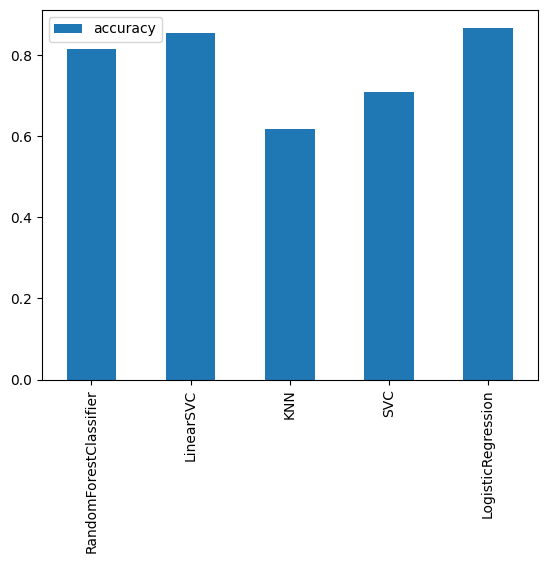

In [22]:
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["accuracy"])
results_df
# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar()